In [6]:
import seaborn
from csv import reader
from pathlib import Path


class Data:
    def __init__(self, location) -> None:
        self.location = location

    def read_data(self):
        self.data = []
        with open(self.location, 'r', encoding='utf-8') as fs:
            csvr = reader(fs, delimiter=',', quotechar='|')
            self.varnames = csvr.__next__()
            self.gender_inx = self.varnames.index('female')
            for line in csvr:
                self.data.append(line)
    
    def construct_variables(self):
        for inx, var in enumerate(self.varnames):
            values = [x[inx] for x in self.data if x[inx] != '']
            self.set_value(var, values)

    def set_value(self, attr, value):
        if attr == 'female':
            value = [bool(val) for val in value]
            return setattr(self, attr, value)
        if attr == 'GLOBAL_CLASS':
            return setattr(self, attr, value)
        if attr == 'pf' or attr == 'pm':
            value = [int(val) for val in value]
            return setattr(self, attr, value)
        if '_female' in attr:
            value = [float(val) for inx, val in enumerate(value) if self.female[inx] == True]
            return setattr(self, attr, value)
        if '_male' in attr:
            value = [float(val) for inx, val in enumerate(value) if self.female[inx] == False]
            return setattr(self, attr, value)


In [3]:

fe_location = Path('G:\My Drive\RAE\python-graphs.csv')
fe_data = Data(fe_location)
fe_data.read_data()
fe_data.construct_variables()



<AxesSubplot: >

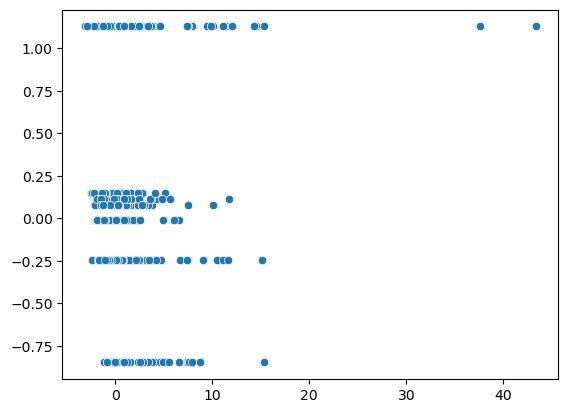

In [4]:
seaborn.scatterplot(x=fe_data.fe1_female, y=fe_data.fe2_female)

<AxesSubplot: >

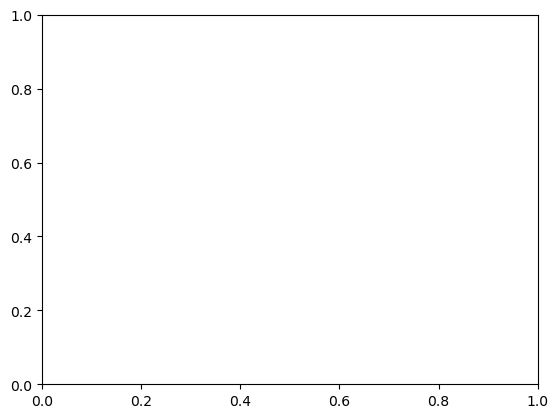

In [8]:
seaborn.scatterplot(x=fe_data.fe1_male, y=fe_data.fe2_male)

In [11]:
fe_data